**Part 1**

Hebbian Learning Rule is one of the first and also easiest learning rules in the neural network. It is used for pattern classification. It is a single layer neural network, i.e. it has one input layer and one output layer. The input layer can have many units, say n. The output layer only has one unit. Hebbian rule works by updating the weights between neurons in the neural network for each training sample.

Hebbian Learning Rule Algorithm : 

1. Set all weights to zero, wi = 0 for i=1 to n, and bias to zero.
2. For each input vector, S(input vector) : t(target output pair), repeat steps 3-5.
3. Set activations for input units with the input vector Xi = Si for i = 1 to n.
4. Set the corresponding output value to the output neuron, i.e. y = t.
5. Update weight and bias by applying Hebb rule for all i = 1 to n:

                                Wi(new) = wi(old) + xi * y
                                  B(new) = B(old) + y
 
Activation Function: 

                if net >= 0    :   f(net) = 1
                if net < 0     :   f(net) = -1



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math
import random
import copy

**Inputs and outputs**

In [ ]:
input_1 = np.array([
    -1,-1,-1,-1,-1,-1,1,
    -1,-1,-1,-1,-1,-1,1,
    1,1,1,1,1,1,1,
    1,-1,-1,1,-1,-1,-1,
    1,-1,-1,1,-1,-1,-1,
    -1,-1,-1,1,-1,-1,-1,
    -1,-1,-1,1,-1,-1,-1,
    -1,-1,-1,1,-1,-1,-1,
    -1,-1,-1,1,-1,-1,-1,
])

input_2 = np.array([
    1,-1,-1,-1,-1,-1,1,
    1,-1,-1,-1,-1,-1,1,
    1,-1,-1,-1,-1,-1,1,
    1,-1,-1,-1,-1,-1,1,
    1,-1,-1,-1,-1,-1,1,
    1,-1,-1,-1,-1,-1,1,
    1,1,1,1,1,1,1,
    -1,-1,-1,-1,-1,-1,-1,
    -1,-1,-1,1,-1,-1,-1,
])


input_3 = np.array([
    1,-1,-1,-1,-1,-1,1,
    1,-1,-1,-1,-1,-1,1,
    1,-1,-1,-1,-1,-1,1,
    1,-1,-1,-1,-1,-1,1,
    1,-1,-1,1,-1,-1,1,
    1,-1,-1,-1,-1,-1,1,
    1,-1,-1,-1,-1,-1,1,
    1,-1,-1,-1,-1,-1,1,
    1,1,1,1,1,1,1,
])


output_1 = np.array([
    -1,-1,1,
    1,1,1,
    1,1,-1,
    -1,1,-1,
    -1,1,-1,
])

output_2 = np.array([
    1,-1,1,
    1,-1,1,
    1,1,1,
    -1,-1,-1,
    -1,1,-1
])

output_3 = np.array([
    1,-1,1,
    1,-1,1,
    1,1,1,
    1,-1,1,
    1,1,1
])

**plotting inputs and outputs**

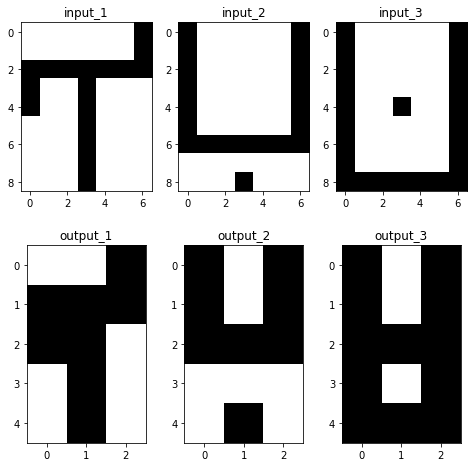

In [ ]:
fig = plt.figure(figsize=(8, 8))
fig.add_subplot(2, 3, 1)
plt.imshow(input_1.reshape((9, 7)), interpolation='nearest',cmap='Greys')
plt.title('input_1')
fig.add_subplot(2, 3, 2)
plt.imshow(input_2.reshape((9, 7)), interpolation='nearest',cmap='Greys')
plt.title('input_2')
fig.add_subplot(2, 3, 3)
plt.imshow(input_3.reshape((9, 7)), interpolation='nearest',cmap='Greys')
plt.title('input_3')

fig.add_subplot(2, 3, 4)
plt.imshow(output_1.reshape((5, 3)), interpolation='nearest',cmap='Greys')
plt.title('output_1')
fig.add_subplot(2, 3, 5)
plt.imshow(output_2.reshape((5, 3)), interpolation='nearest',cmap='Greys')
plt.title('output_2')
fig.add_subplot(2, 3, 6)
plt.imshow(output_3.reshape((5, 3)), interpolation='nearest',cmap='Greys')
plt.title('output_3')

plt.show()

**Define the model**

In [ ]:
class Hebbian:
    def __init__(self, _S, _T):
        self.S = _S
        self.T = _T
        self.W = np.zeros((len(_S[1]), len(_T[1])))
        
    def train(self):
        for trainSample in range(len(self.S)):
            x = self.S[trainSample]
            y = self.T[trainSample]
            for i in range(len(x)):
                for j in range(len(y)):
                    self.W[i][j] = self.W[i][j] + x[i]*y[j]
    def showResult_1(self, X):
        y_t = np.dot(X,self.W)
        for i in range(len(y_t)): #sign
            if(y_t[i] >= 0):
                y_t[i] = 1
            else:
                y_t[i] = -1
        plt.figure()
        plt.imshow(y_t.reshape((5, 3)), cmap='binary')                   
    
    def showResult_2(self, X):
        y_t = np.dot(X,self.W)
        for i in range(len(y_t)):
            if(y_t[i] >= 0):
                y_t[i] = 1
            else:
                y_t[i] = -1
        plt.figure()
        plt.imshow(y_t.reshape((2, 2)), cmap='binary')

**Train the model**

In [ ]:
input_1_reshaped = input_1.reshape((input_1.shape[0]))
input_2_reshaped = input_2.reshape((input_2.shape[0]))
input_3_reshaped = input_3.reshape((input_3.shape[0]))
output_1_reshaped = output_1.reshape((output_1.shape[0]))
output_2_reshaped = output_2.reshape((output_2.shape[0]))
output_3_reshaped = output_3.reshape((output_3.shape[0]))

S = np.array([copy.deepcopy(input_1_reshaped), copy.deepcopy(input_2_reshaped), copy.deepcopy(input_3_reshaped)])
T = np.array([copy.deepcopy(output_1_reshaped), copy.deepcopy(output_2_reshaped), copy.deepcopy(output_3_reshaped)])
heb = Hebbian(S, T)
heb.train()

**Part 2**

Weights

In [ ]:
heb.W

array([[ 3., -1.,  1.,  1., -3.,  1.,  1.,  1.,  3.,  1., -3.,  1.,  1.,
         1.,  1.],
       [-1.,  3., -3., -3.,  1., -3., -3., -3., -1.,  1.,  1.,  1.,  1.,
        -3.,  1.],
       [-1.,  3., -3., -3.,  1., -3., -3., -3., -1.,  1.,  1.,  1.,  1.,
        -3.,  1.],
       [-1.,  3., -3., -3.,  1., -3., -3., -3., -1.,  1.,  1.,  1.,  1.,
        -3.,  1.],
       [-1.,  3., -3., -3.,  1., -3., -3., -3., -1.,  1.,  1.,  1.,  1.,
        -3.,  1.],
       [-1.,  3., -3., -3.,  1., -3., -3., -3., -1.,  1.,  1.,  1.,  1.,
        -3.,  1.],
       [ 1., -3.,  3.,  3., -1.,  3.,  3.,  3.,  1., -1., -1., -1., -1.,
         3., -1.],
       [ 3., -1.,  1.,  1., -3.,  1.,  1.,  1.,  3.,  1., -3.,  1.,  1.,
         1.,  1.],
       [-1.,  3., -3., -3.,  1., -3., -3., -3., -1.,  1.,  1.,  1.,  1.,
        -3.,  1.],
       [-1.,  3., -3., -3.,  1., -3., -3., -3., -1.,  1.,  1.,  1.,  1.,
        -3.,  1.],
       [-1.,  3., -3., -3.,  1., -3., -3., -3., -1.,  1.,  1.,  1.,  1.,
       

**Part 3**

As we can see all three of our optimal outputs have been produced

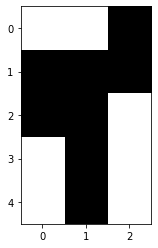

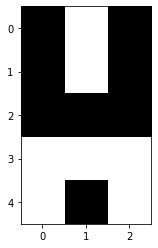

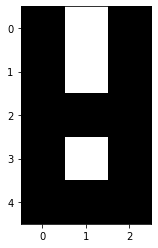

In [ ]:
heb.showResult_1(input_1)
heb.showResult_1(input_2)
heb.showResult_1(input_3)

**Part 4**

The smallest dimension we can reduce to is 2x2

In [ ]:
input_1_smallest = np.array([
    1, 1,
    -1,1
]).reshape(2,2)

input_2_smallest = np.array([
    1, 1,
    -1,-1
]).reshape(2,2)

input_3_smallest = np.array([
    1, 1,
    1,-1
]).reshape(2,2)

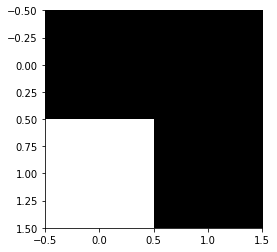

In [ ]:
plt.imshow(input_1_smallest.reshape((2,2)), interpolation='nearest',cmap='Greys')
plt.show()

In [ ]:
input_1_reshaped = input_1.reshape((input_1.shape[0]))
input_2_reshaped = input_2.reshape((input_2.shape[0]))
input_3_reshaped = input_3.reshape((input_3.shape[0]))
input_1_smallest_reshaped = input_1_smallest.reshape((4))
input_2_smallest_reshaped = input_2_smallest.reshape((4))
input_3_smallest_reshaped = input_3_smallest.reshape((4))

S = np.array([copy.deepcopy(input_1_reshaped), copy.deepcopy(input_2_reshaped), copy.deepcopy(input_3_reshaped)])
T = np.array([copy.deepcopy(input_1_smallest_reshaped), copy.deepcopy(input_2_smallest_reshaped), copy.deepcopy(input_3_smallest_reshaped)])
heb2 = Hebbian(S,T)
heb2.train()

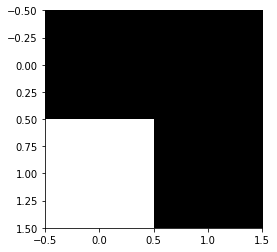

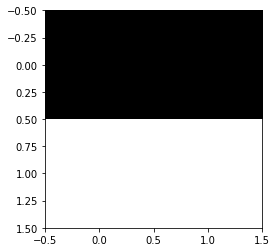

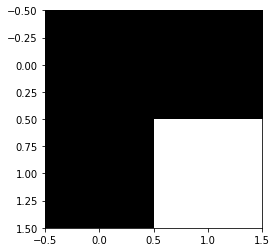

In [ ]:
heb2.showResult_2(input_1)
heb2.showResult_2(input_2)
heb2.showResult_2(input_3)

**Part 5**

**Adding noise 20% to input of parts two and four of the model**

The accuracy of part 2's model with 20% noise applied is 100%.

In [ ]:
def ResultWhitNoise(arr,percentage):
    pixels = int(np.prod(arr.shape)*percentage)
    with_noise = np.copy(arr)
    for pixel in range(pixels) :
      random_pixel = np.random.choice(np.prod(with_noise.shape), 1)
      if with_noise.flat[random_pixel] == -1 :
        with_noise.flat[random_pixel] = 1
      else:
        with_noise.flat[random_pixel] = -1
    
    return with_noise

In [ ]:
input_1_noise_20 = ResultWhitNoise(input_1,0.2)
input_2_noise_20 = ResultWhitNoise(input_2,0.2)
input_3_noise_20 = ResultWhitNoise(input_3,0.2)

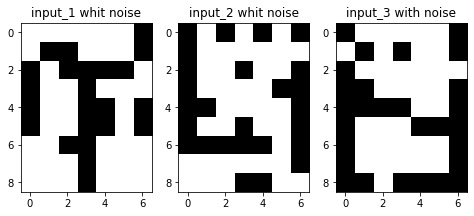

In [ ]:
fig = plt.figure(figsize=(8, 8))
fig.add_subplot(1, 3, 1)
plt.imshow(input_1_noise_20.reshape((9, 7)), interpolation='nearest',cmap='Greys')
plt.title('input_1 whit noise')
fig.add_subplot(1, 3, 2)
plt.imshow(input_2_noise_20.reshape((9, 7)), interpolation='nearest',cmap='Greys')
plt.title('input_2 whit noise')
fig.add_subplot(1, 3, 3)
plt.imshow(input_3_noise_20.reshape((9, 7)), interpolation='nearest',cmap='Greys')
plt.title('input_3 with noise')
plt.show()

In [ ]:
S = np.array([copy.deepcopy(input_1), copy.deepcopy(input_2), copy.deepcopy(input_3)])
T = np.array([copy.deepcopy(output_1), copy.deepcopy(output_2), copy.deepcopy(output_3)])
heb3 = Hebbian(S,T)
heb3.train()

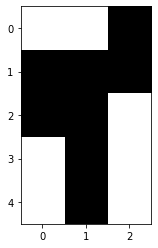

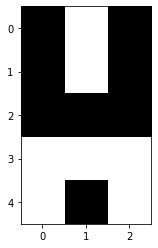

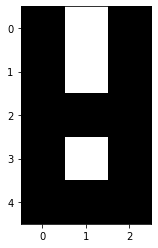

In [ ]:
heb3.showResult_1(input_1_noise_20)
heb3.showResult_1(input_2_noise_20)
heb3.showResult_1(input_3_noise_20)

**The accuracy of part 4's model with 20% noise applied is 100%.**

In [ ]:
input_1_noise_20 = ResultWhitNoise(input_1,0.2)
input_2_noise_20 = ResultWhitNoise(input_2,0.2)
input_3_noise_20 = ResultWhitNoise(input_3,0.2)

In [ ]:
S = np.array([copy.deepcopy(input_1), copy.deepcopy(input_2), copy.deepcopy(input_3)])
T = np.array([copy.deepcopy(input_1_smallest_reshaped), copy.deepcopy(input_2_smallest_reshaped), copy.deepcopy(input_3_smallest_reshaped)])
heb4 = Hebbian(S,T)
heb4.train()

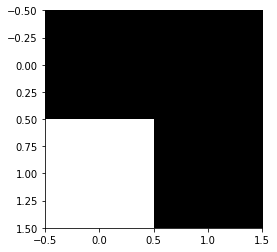

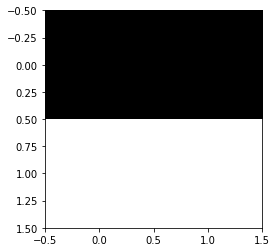

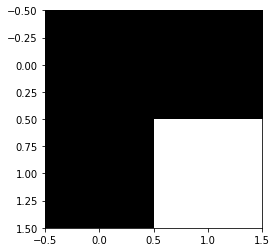

In [ ]:
heb4.showResult_2(input_1_noise_20)
heb4.showResult_2(input_2_noise_20)
heb4.showResult_2(input_3_noise_20)

**Part 5**

**Adding noise 60% to input of parts two and four of the model**

The accuracy of part 2's model with 60% noise applied is 66.6%.

In [ ]:
input_1_noise_60 = ResultWhitNoise(input_1,0.6)
input_2_noise_60 = ResultWhitNoise(input_2,0.6)
input_3_noise_60 = ResultWhitNoise(input_3,0.6)

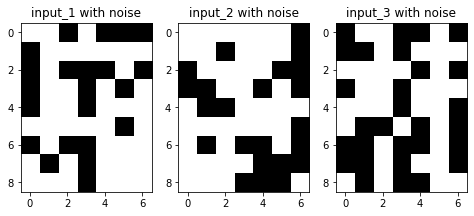

In [ ]:
fig = plt.figure(figsize=(8, 8))
fig.add_subplot(1, 3, 1)
plt.imshow(input_1_noise_60.reshape((9, 7)), interpolation='nearest',cmap='Greys')
plt.title('input_1 with noise')
fig.add_subplot(1, 3, 2)
plt.imshow(input_2_noise_60.reshape((9, 7)), interpolation='nearest',cmap='Greys')
plt.title('input_2 with noise')
fig.add_subplot(1, 3, 3)
plt.imshow(input_3_noise_60.reshape((9, 7)), interpolation='nearest',cmap='Greys')
plt.title('input_3 with noise')
plt.show()

In [ ]:
S = np.array([copy.deepcopy(input_1), copy.deepcopy(input_2), copy.deepcopy(input_3)])
T = np.array([copy.deepcopy(output_1), copy.deepcopy(output_2), copy.deepcopy(output_3)])
heb5 = Hebbian(S,T)
heb5.train()

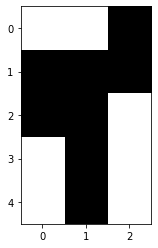

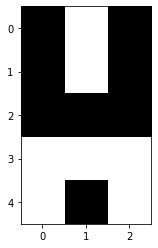

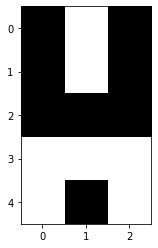

In [ ]:
heb5.showResult_1(input_1_noise_60)
heb5.showResult_1(input_2_noise_60)
heb5.showResult_1(input_3_noise_60)

**The accuracy of part 4's model with 60% noise applied is 33.3%.**

In [ ]:
input_1_noise_60 = ResultWhitNoise(input_1,0.6)
input_1_noise_60 = ResultWhitNoise(input_2,0.6)
input_1_noise_60 = ResultWhitNoise(input_3,0.6)

In [ ]:
S = np.array([copy.deepcopy(input_1), copy.deepcopy(input_2), copy.deepcopy(input_3)])
T = np.array([copy.deepcopy(input_1_smallest_reshaped), copy.deepcopy(input_2_smallest_reshaped), copy.deepcopy(input_3_smallest_reshaped)])
heb6 = Hebbian(S,T)
heb6.train()

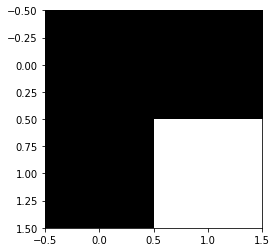

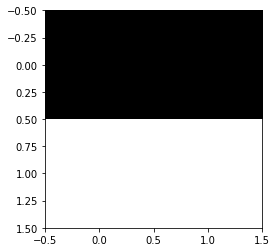

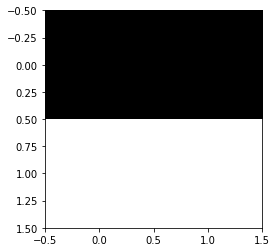

In [ ]:
heb6.showResult_2(input_1_noise_60)
heb6.showResult_2(input_2_noise_60)
heb6.showResult_2(input_3_noise_60)

**Part 6**

**Results of part 2's Inputs with 20% & 60% Lost**

In [ ]:
def showResultWithLost(arr,percentage):
    pixels = int(np.prod(arr.shape)*percentage)
    with_noise = np.copy(arr)
    for pixel in range(pixels) :
      random_pixel = np.random.choice(np.prod(with_noise.shape), 1)
      with_noise.flat[random_pixel] = 0
    return with_noise

In [ ]:
input_1_lost_20 = showResultWithLost(input_1,0.2)
input_2_lost_20 = showResultWithLost(input_2,0.2)
input_3_lost_20 = showResultWithLost(input_3,0.2)

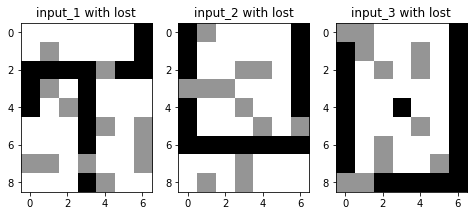

In [ ]:
fig = plt.figure(figsize=(8, 8))
fig.add_subplot(1, 3, 1)
plt.imshow(input_1_lost_20.reshape((9, 7)), interpolation='nearest',cmap='Greys')
plt.title('input_1 with lost')
fig.add_subplot(1, 3, 2)
plt.imshow(input_2_lost_20.reshape((9, 7)), interpolation='nearest',cmap='Greys')
plt.title('input_2 with lost')
fig.add_subplot(1, 3, 3)
plt.imshow(input_3_lost_20.reshape((9, 7)), interpolation='nearest',cmap='Greys')
plt.title('input_3 with lost')
plt.show()

**The accuracy of model is 100%**

In [ ]:
S = np.array([copy.deepcopy(input_1), copy.deepcopy(input_2), copy.deepcopy(input_3)])
T = np.array([copy.deepcopy(output_1), copy.deepcopy(output_2), copy.deepcopy(output_3)])
heb7 = Hebbian(S,T)
heb7.train()

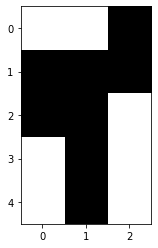

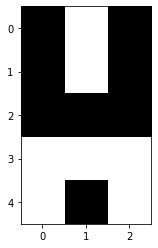

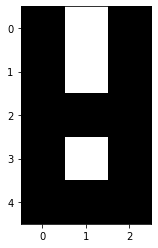

In [ ]:
heb7.showResult_1(input_1_lost_20)
heb7.showResult_1(input_2_lost_20)
heb7.showResult_1(input_3_lost_20)

In [ ]:
input_1_lost_60 = showResultWithLost(input_1,0.6)
input_2_lost_60 = showResultWithLost(input_2,0.6)
input_3_lost_60 = showResultWithLost(input_3,0.6)

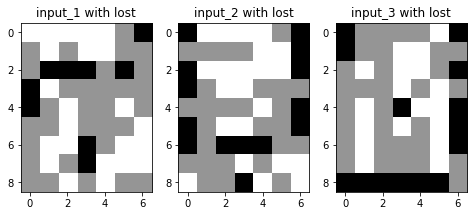

In [ ]:
fig = plt.figure(figsize=(8, 8))
fig.add_subplot(1, 3, 1)
plt.imshow(input_1_lost_60.reshape((9, 7)), interpolation='nearest',cmap='Greys')
plt.title('input_1 with lost')
fig.add_subplot(1, 3, 2)
plt.imshow(input_2_lost_60.reshape((9, 7)), interpolation='nearest',cmap='Greys')
plt.title('input_2 with lost')
fig.add_subplot(1, 3, 3)
plt.imshow(input_3_lost_60.reshape((9, 7)), interpolation='nearest',cmap='Greys')
plt.title('input_3 with lost')
plt.show()

**The accuracy of model is 100%**

In [ ]:
S = np.array([copy.deepcopy(input_1), copy.deepcopy(input_2), copy.deepcopy(input_3)])
T = np.array([copy.deepcopy(output_1), copy.deepcopy(output_2), copy.deepcopy(output_3)])
heb8 = Hebbian(S,T)
heb8.train()

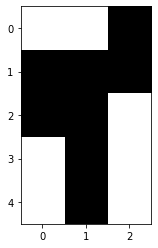

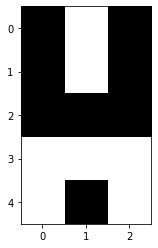

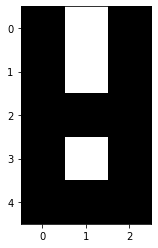

In [ ]:
heb8.showResult_1(input_1_lost_60)
heb8.showResult_1(input_2_lost_60)
heb8.showResult_1(input_3_lost_60)

**Results of part 4's Inputs with 20% & 60% Lost**

**The accuracy of model for both (20 and 60) is 100%**

In [ ]:
input_1_lost_20 = showResultWithLost(input_1,0.2)
input_2_lost_20 = showResultWithLost(input_2,0.2)
input_3_lost_20 = showResultWithLost(input_3,0.2)

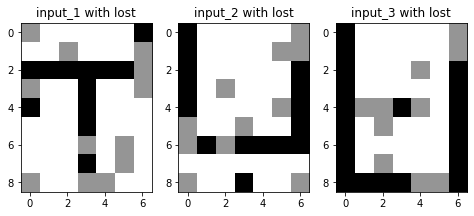

In [ ]:
fig = plt.figure(figsize=(8, 8))
fig.add_subplot(1, 3, 1)
plt.imshow(input_1_lost_20.reshape((9, 7)), interpolation='nearest',cmap='Greys')
plt.title('input_1 with lost')
fig.add_subplot(1, 3, 2)
plt.imshow(input_2_lost_20.reshape((9, 7)), interpolation='nearest',cmap='Greys')
plt.title('input_2 with lost')
fig.add_subplot(1, 3, 3)
plt.imshow(input_3_lost_20.reshape((9, 7)), interpolation='nearest',cmap='Greys')
plt.title('input_3 with lost')
plt.show()

In [ ]:
S = np.array([copy.deepcopy(input_1), copy.deepcopy(input_2), copy.deepcopy(input_3)])
T = np.array([copy.deepcopy(input_1_smallest_reshaped), copy.deepcopy(input_2_smallest_reshaped), copy.deepcopy(input_3_smallest_reshaped)])
heb9 = Hebbian(S,T)
heb9.train()

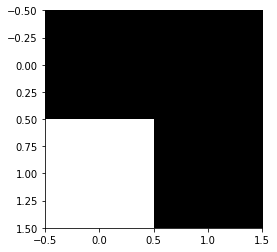

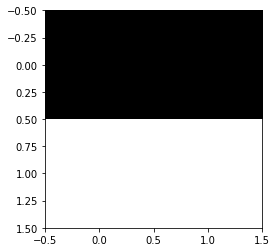

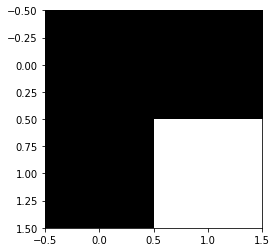

In [ ]:
heb9.showResult_2(input_1_lost_20)
heb9.showResult_2(input_2_lost_20)
heb9.showResult_2(input_3_lost_20)

In [ ]:
input_1_lost_60 = showResultWithLost(input_1,0.6)
input_2_lost_60 = showResultWithLost(input_2,0.6)
input_3_lost_60 = showResultWithLost(input_3,0.6)

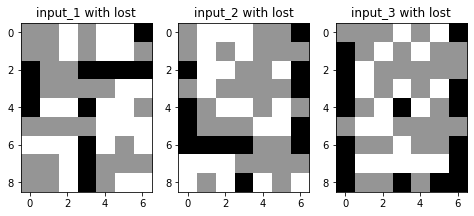

In [ ]:
fig = plt.figure(figsize=(8, 8))
fig.add_subplot(1, 3, 1)
plt.imshow(input_1_lost_60.reshape((9, 7)), interpolation='nearest',cmap='Greys')
plt.title('input_1 with lost')
fig.add_subplot(1, 3, 2)
plt.imshow(input_2_lost_60.reshape((9, 7)), interpolation='nearest',cmap='Greys')
plt.title('input_2 with lost')
fig.add_subplot(1, 3, 3)
plt.imshow(input_3_lost_60.reshape((9, 7)), interpolation='nearest',cmap='Greys')
plt.title('input_3 with lost')
plt.show()

In [ ]:
S = np.array([copy.deepcopy(input_1), copy.deepcopy(input_2), copy.deepcopy(input_3)])
T = np.array([copy.deepcopy(input_1_smallest_reshaped), copy.deepcopy(input_2_smallest_reshaped), copy.deepcopy(input_3_smallest_reshaped)])
heb10 = Hebbian(S,T)
heb10.train()

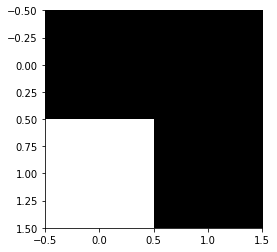

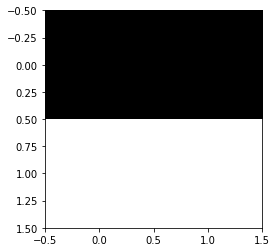

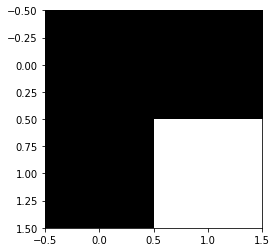

In [ ]:
heb10.showResult_2(input_1_lost_60)
heb10.showResult_2(input_2_lost_60)
heb10.showResult_2(input_3_lost_60)

**Part 7**

The model with 20% noise can predict properly for both inputs(2 and 4).

The accuracy of model whit 60% noise for part 2's input is 66.6% and for part 4's input is 33.3%.

The model with 20 and 60% information loss can predict properly for both inputs(2 and 4).

so the model is resistant to information loss than noise. 

Reduce dimensions helps network resistance when losing information(to a point)